Mean:
 Campaign_Budget             50030.370287
Ad_Click_Rate                   5.219229
Conversion_Rate                 5.276598
Social_Media_Followers     201322.701600
Email_Open_Rate                45.013461
Customer_Retention_Rate        74.857198
dtype: float64
Median:
 Campaign_Budget             50042.030
Ad_Click_Rate                   5.220
Conversion_Rate                 5.290
Social_Media_Followers     202074.000
Email_Open_Rate                44.965
Customer_Retention_Rate        74.720
dtype: float64
Mode:
 Campaign_Budget                    12885.8
Ad_Click_Rate                          3.2
Conversion_Rate                        4.9
Social_Media_Followers            165887.0
Email_Open_Rate                       39.3
Customer_Retention_Rate              52.42
Platform                           Twitter
Campaign_Type              Brand Awareness
Target_Audience                      Gen Z
Region                              Africa
Name: 0, dtype: object
Standard Deviation:


,count,mean,std,min,25%,50%,75%,max
Campaign_Budget,19234.0,50159.844328,19295.880657,155.91,36721.4975,50112.110,63396.2825,103698.0
Ad_Click_Rate,19234.0,5.218623,2.733292,0.50,2.8400,5.230,7.5500,10.0
Conversion_Rate,19234.0,5.277074,2.726216,0.50,2.9200,5.290,7.6200,10.0
Social_Media_Followers,19234.0,206071.869970,92878.796821,127.00,137991.5000,204400.000,270069.5000,470565.0
Email_Open_Rate,19234.0,45.045230,20.125788,10.00,27.4900,45.045,62.6300,80.0
Customer_Retention_Rate,19234.0,74.870049,14.402405,50.00,62.3925,74.760,87.3375,100.0


,Mean,Median,Mode,Standard Deviation
Ad_Click_Rate,5.218623,5.230,3.2,2.733292
Campaign_Budget,50159.844328,50112.110,12885.8,19295.880657
Campaign_Type,NaN,NaN,Brand Awareness,NaN
Conversion_Rate,5.277074,5.290,4.9,2.726216
Customer_Retention_Rate,74.870049,74.760,53.1,14.402405
Email_Open_Rate,45.045230,45.045,55.83,20.125788
Platform,NaN,NaN,Twitter,NaN
Region,NaN,NaN,Africa,NaN
Social_Media_Followers,206071.869970,204400.000,165887.0,92878.796821
Target_Audience,NaN,NaN,Gen Z,NaN


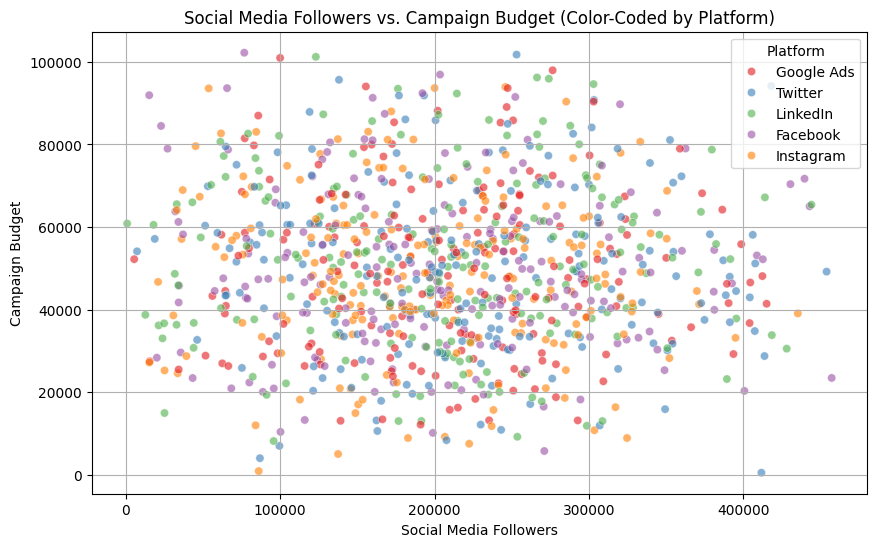

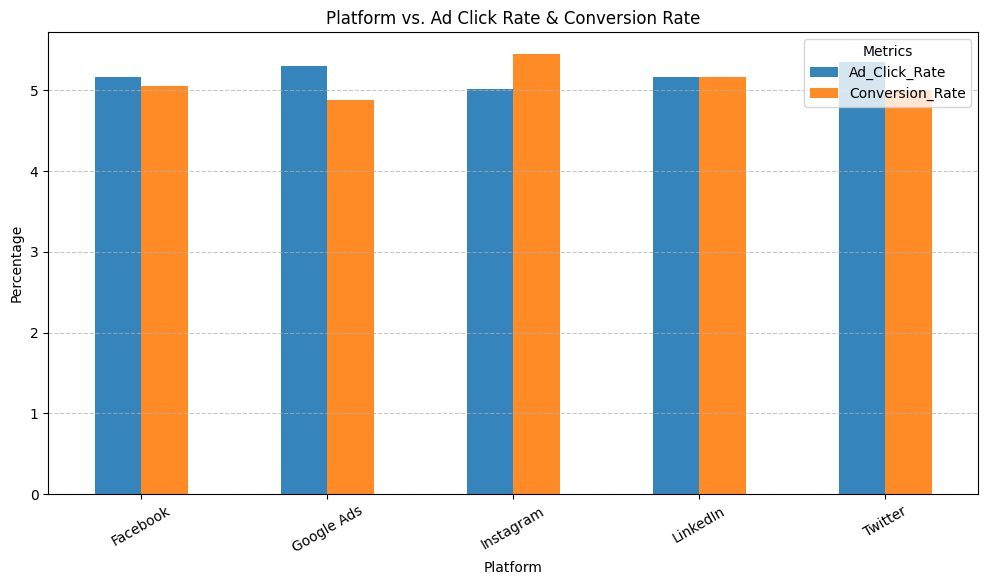

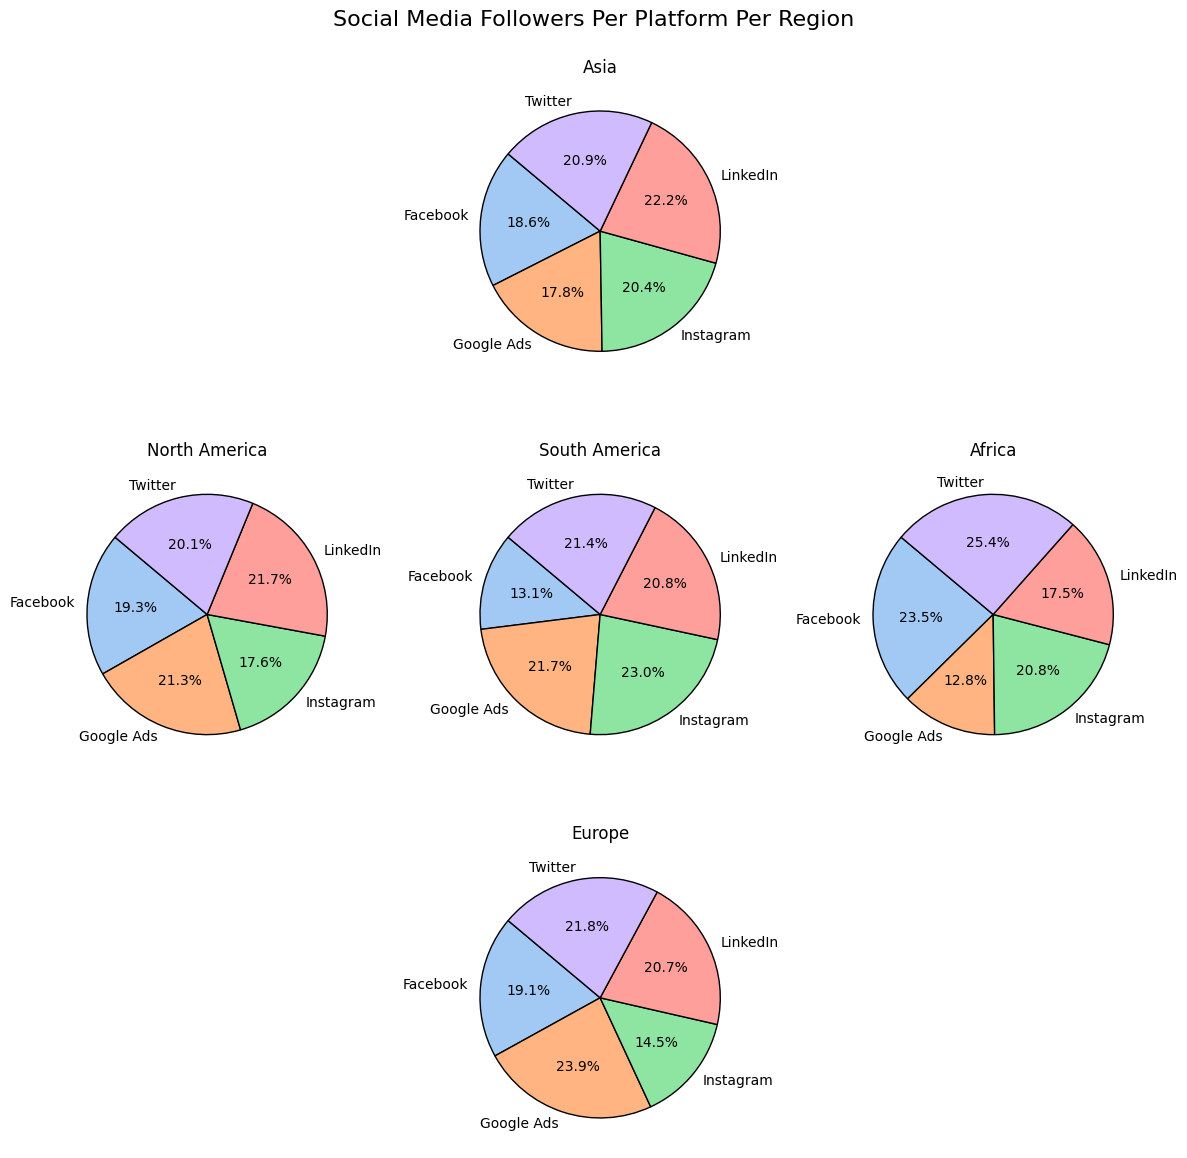

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Marketing_Design_Dataset.csv")
df.head()

df.describe(include='all')
df.isnull().sum()

print("Mean:\n", df.mean(numeric_only=True))
print("Median:\n", df.median(numeric_only=True))
print("Mode:\n", df.mode().iloc[0])
print("Standard Deviation:\n", df.std(numeric_only=True))

df = df[(df['Campaign_Budget'] > 0) &
        (df['Social_Media_Followers'] > 0)]

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers(df, col)

desc_stats = df.describe().transpose()
display(desc_stats)

stats_table = pd.DataFrame({
    "Mean": df.mean(numeric_only=True),
    "Median": df.median(numeric_only=True),
    "Mode": df.mode().iloc[0],
    "Standard Deviation": df.std(numeric_only=True)
})
display(stats_table)

df_sample = df.sample(1000, random_state=42)

plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=df_sample['Social_Media_Followers'],
    y=df_sample['Campaign_Budget'],
    hue=df_sample['Platform'],
    palette="Set1",
    alpha=0.6
)

plt.xlabel("Social Media Followers")
plt.ylabel("Campaign Budget")
plt.title("Social Media Followers vs. Campaign Budget (Color-Coded by Platform)")
plt.legend(title="Platform")
plt.grid(True)

plt.show()

grouped_data = df_sample.groupby('Platform')[['Ad_Click_Rate', 'Conversion_Rate']].mean()

custom_colors = ['royalblue', 'red']

grouped_data.plot(kind='bar', alpha=0.9, figsize=(12, 6))

plt.xlabel("Platform")
plt.ylabel("Percentage")
plt.title("Platform vs. Ad Click Rate & Conversion Rate")
plt.xticks(rotation=30)
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

grouped_data = df_sample.groupby(['Region', 'Platform'])['Social_Media_Followers'].sum().reset_index()

regions = grouped_data['Region'].unique()

positions = [(1, 2), (0, 1), (2, 1), (1, 0), (1, 1)]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))

for i, region in enumerate(regions[:5]):
    ax = axes[positions[i]]
    region_data = grouped_data[grouped_data['Region'] == region]


    ax.pie(region_data['Social_Media_Followers'], labels=region_data['Platform'],
           autopct='%1.1f%%', colors=sns.color_palette("pastel", len(region_data)),wedgeprops={'edgecolor': 'black'},startangle=140)


    ax.set_title(region)

for r in range(3):
    for c in range(3):
        if (r, c) not in positions:
            fig.delaxes(axes[r, c])

plt.suptitle("Social Media Followers Per Platform Per Region", fontsize=16)
plt.tight_layout()
plt.show()